In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import statsmodels.tsa.api as smt
import statsmodels.stats.api as sms
import statsmodels.api as sm
import scipy.stats as scs
import math

In [2]:
def tsplot(y, lags=None, figsize=(10, 8), style='bmh'):
    """Helpful function to plot timeseries"""
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.tight_layout()
    return 

In [3]:
def OSR2(predictions, train, test):
    sse = sum((test - predictions)**2)
    sst = sum((test - np.mean(train))**2)
    r2 = 1 - sse/sst
    
    return r2

In [4]:
df = pd.read_csv("data_GE.csv")   # change dataset name

In [5]:
df.head()

,Unnamed: 0,timestamp,open,high,low,close,volume,time,EMA,time.1,RSI,time.2,MFI
0,0,2019-04-15,9.01,9.05,8.790,8.98,82881064,2019-04-15,9.5172,2019-04-15,32.7080,2019-04-15,22.4851
1,1,2019-04-12,9.15,9.21,8.990,9.00,69332035,2019-04-12,9.5998,2019-04-12,33.0027,2019-04-12,28.8371
2,2,2019-04-11,9.12,9.26,9.095,9.12,54814779,2019-04-11,9.6921,2019-04-11,34.7466,2019-04-11,29.3018
3,3,2019-04-10,9.25,9.26,9.080,9.16,53871400,2019-04-10,9.7801,2019-04-10,35.3244,2019-04-10,28.2268
4,4,2019-04-09,9.35,9.41,9.120,9.22,83170707,2019-04-09,9.8755,2019-04-09,36.1619,2019-04-09,34.1142


In [6]:
# interested in 1-day close price
close = df.close
close.name = 'close'
close.head()

0    8.98
1    9.00
2    9.12
3    9.16
4    9.22
Name: close, dtype: float64

In [11]:
len(close)

5341

In [14]:
train = close.loc[:len(close) - int(len(close)*0.15) -1]
test = close.loc[len(close) - int(len(close)*0.15) :]
print(train.tail())
print(test.head())

4535    39.68
4536    41.80
4537    41.86
4538    41.40
4539    41.55
Name: close, dtype: float64
4540    41.91
4541    40.23
4542    39.99
4543    37.70
4544    39.00
Name: close, dtype: float64


Text(0,0.5,'1-day close price of train set')

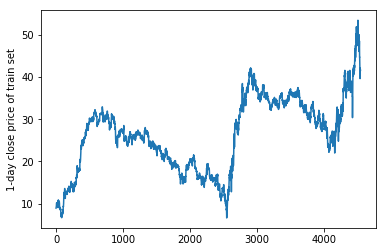

In [15]:
# is 1-day close price  stationary?
train.plot()
plt.ylabel('1-day close price of train set')

Text(0,0.5,'1-day close price of test set')

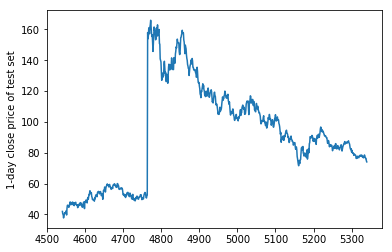

In [16]:
test.plot()
plt.ylabel('1-day close price of test set')

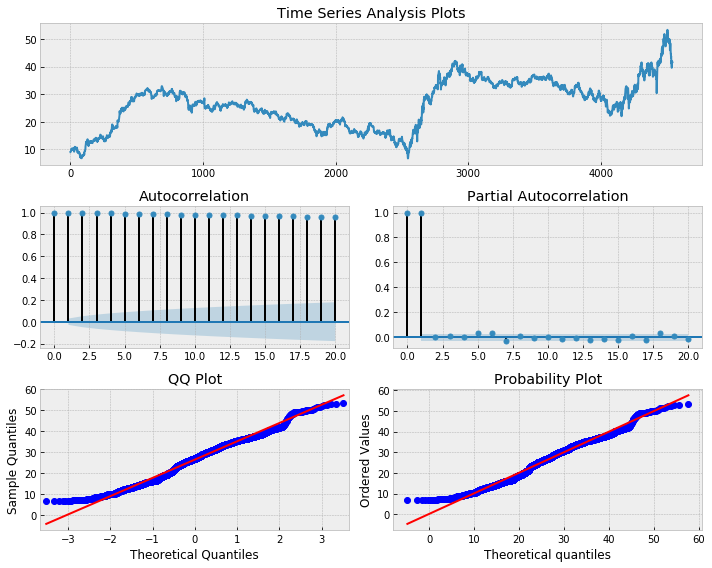

In [17]:
tsplot(train, lags=20)

In [18]:
# Augmented Dickey-Fuller unit root test
smt.adfuller(train, maxlag=20)
# first value is test statistic. Second value is the p-value
# p-value is not small enough to reject the null-hypothesis that the TS is non-stationary

(-1.706148098911508,
 0.42794760779650476,
 17,
 4522,
 {'1%': -3.431796929668033,
  '5%': -2.8621793715766164,
  '10%': -2.5671103408193976},
 5632.831661881594)

Text(0,0.5,'Difference in 1-day close price')

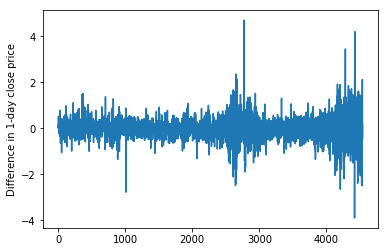

In [19]:
# are the difference between two 1-day close price stationary?
train_diff = train.diff().dropna()
train_diff.name = 'train close diff'
train_diff.plot()
plt.ylabel('Difference in 1-day close price')

In [20]:
# Augmented Dickey-Fuller unit root test
smt.adfuller(train_diff, maxlag=20)
# first value is test statistic. Second value is the p-value
# p-value is small enough to reject the null-hypothesis that the TS is non-stationary

(-16.57245978473489,
 1.8649972479454457e-29,
 16,
 4522,
 {'1%': -3.431796929668033,
  '5%': -2.8621793715766164,
  '10%': -2.5671103408193976},
 5633.254356786871)

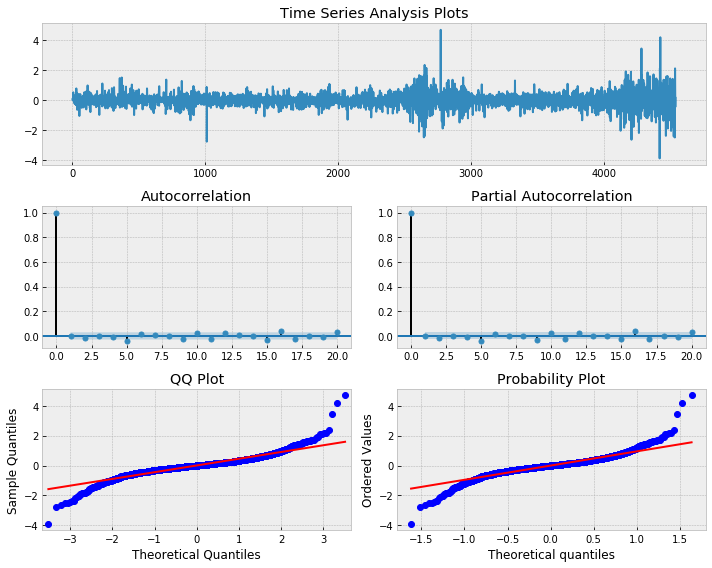

In [21]:
tsplot(train_diff, lags=20)

### Fit Model

In [22]:
arima010 = smt.ARIMA(train, (0,1,0)) #第一个AR， 第二个d，第三个MA  change parameters & model name
arima010_fit = arima010.fit() #change model name*2
arima010_fit.summary() #change model name

/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `ar

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.close   No. Observations:                 4539
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -2821.297
Method:                           css   S.D. of innovations              0.451
Date:                Wed, 17 Apr 2019   AIC                           5646.595
Time:                        15:14:28   BIC                           5659.436
Sample:                             1   HQIC                          5651.117
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0072      0.007      1.073      0.283      -0.006       0.020
==============================================================================
"""

In [26]:
arima110 = smt.ARIMA(train, (1,1,0)) #第一个AR， 第二个d，第三个MA  change parameters & model name
arima110_fit = arima110.fit() #change model name*2
arima110_fit.summary() #change model name

/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `ar

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.close   No. Observations:                 4539
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -2821.297
Method:                       css-mle   S.D. of innovations              0.451
Date:                Wed, 17 Apr 2019   AIC                           5648.595
Time:                        15:15:38   BIC                           5667.856
Sample:                             1   HQIC                          5655.378
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0072      0.007      1.073      0.283      -0.006       0.020
ar.L1.D.close    -0.0002      0.015     -0.012      0.991      -0.029       0.029
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1        -5711.9571           +0.0000j         5711.9571            0.5000
-----------------------------------------------------------------------------
"""

In [27]:
arima011 = smt.ARIMA(train, (0,1,1)) #第一个AR， 第二个d，第三个MA  change parameters & model name
arima011_fit = arima011.fit() #change model name*2
arima011_fit.summary() #change model name

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.close   No. Observations:                 4539
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -2821.297
Method:                       css-mle   S.D. of innovations              0.451
Date:                Wed, 17 Apr 2019   AIC                           5648.595
Time:                        15:16:32   BIC                           5667.856
Sample:                             1   HQIC                          5655.378
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0072      0.007      1.073      0.283      -0.006       0.020
ma.L1.D.close    -0.0002      0.015     -0.012      0.990      -0.030       0.030
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1         5485.3793           +0.0000j         5485.3793            0.0000
-----------------------------------------------------------------------------
"""

### Analyze residuals

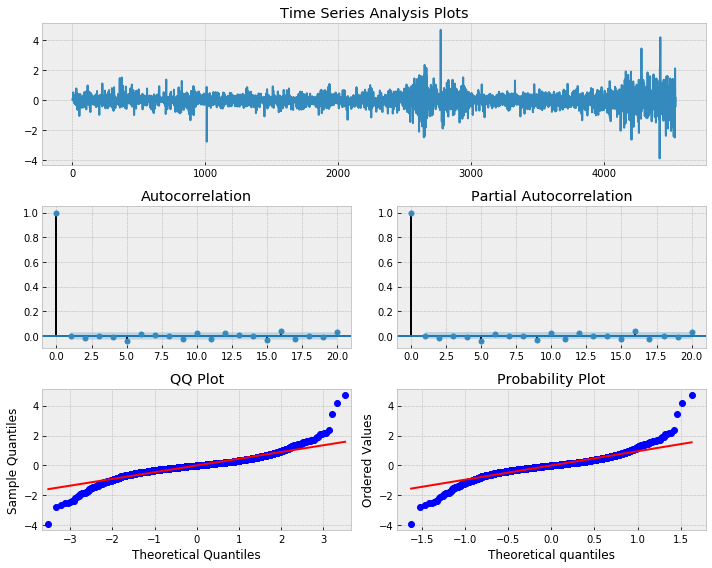

In [32]:
tsplot(arima110_fit.resid, lags=20) #change model name

### Test for remaining autocorrelation

In [33]:
# Ljung box test for remaining autocorrelation
sms.diagnostic.acorr_ljungbox(arima110_fit.resid, lags=(5,)) # or 10 lags       #change model name
#第二个是p-value  p值大于5%,序列为白噪声

(array([10.38992834]), array([0.06491128]))

### Forecasting

In [34]:
num_steps = 5
forecast_mean, forecast_std, forecast_ci = arima110_fit.forecast(steps=num_steps)   #change model name

In [35]:
arima110_fit.forecast(steps=num_steps)   #change model name

(array([41.55715058, 41.56432618, 41.57150176, 41.57867735, 41.58585294]),
 array([0.45051202, 0.63706445, 0.78021865, 0.90090576, 1.00723444]),
 array([[40.67416324, 42.44013793],
        [40.3157028 , 42.81294955],
        [40.0423013 , 43.10070222],
        [39.81293451, 43.34442019],
        [39.61170971, 43.55999617]]))

In [36]:
arima110_fit.forecast(steps=num_steps)[0][4]    #change model name

41.58585293944503

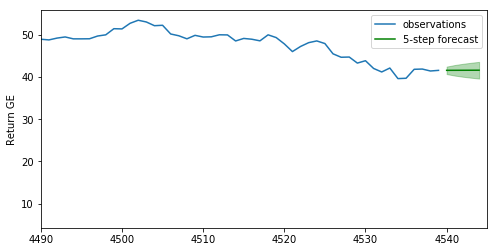

In [37]:
plt.figure(figsize=(8, 4))


plt.plot(train, label='observations')

forecast_steps = range(len(train), len(train) + num_steps)
plt.fill_between(forecast_steps, forecast_ci[:,0], forecast_ci[:,1], color='g', alpha=0.3)
plt.plot(forecast_steps, forecast_mean, label='5-step forecast', color='g')
plt.xlim([len(train) - 50, len(train) + num_steps])
plt.ylabel('Return GE')   #change stock name
plt.legend()

### Calculate the performance metrics on test set

In [38]:
pred = []
for i in range(int(len(close)*0.15)): 
    moving_train = close.loc[:len(close) - int(len(close)*0.15) -5 + i]
    moving_arima110 = smt.ARIMA(moving_train, (1,1,0))   #change model parameters  & model name
    moving_arima110_fit = moving_arima110.fit()   #change model name*2
    
    pred.append(moving_arima110_fit.forecast(steps=5)[0][4]) #change model name

len(pred)

/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `ar

801

In [39]:
print( "OSR2 = " + str(OSR2(pred, train, test)))
print( "MAE = " + str(np.mean(abs(pred - test))))
print( "RMSE = " + str(math.sqrt(np.mean((pred - test)**2))))
print( "Scaled MAE = " + str(np.mean(abs(pred - test))/(max(test)-min(test))))
print( "Scaled RMSE = " + str(math.sqrt(np.mean((pred - test)**2))/(max(test)-min(test))))

OSR2 = 0.9832124213100503
MAE = 3.8449401581916236
RMSE = 9.457911315755204
Scaled MAE = 0.02996835664997368
Scaled RMSE = 0.07371715756629153
